# Final plots and comparatives

Here I will make the final plots and comparatives

## Library

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
from astropy.table import Table
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde
from scipy import stats
import GPz
from astropy.table import Table
import ml_algorithims as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
import metrics

steps = 1000 # pdf - monte carlo steps

## Data

In [3]:
annz = pd.read_csv("/home/rafael/Projetos/master-thesis/ANNz/output/vipers1/regres/eval/ANNZ_randomReg_0000.csv")
ann = pd.read_csv("ANN-Rafael/ann-rafael-results.csv")
gpz = pd.read_csv("GPz/gpz-rafael-results.csv")
annz_mags = pd.read_csv("/home/rafael/Programs/annz/examples/data/photoZ/work/vipersTest.csv")

In [8]:
annz_mags.columns

Index(['#F:MAG_AUTO_G', 'F:MAGERR_AUTO_G', 'F:MAG_AUTO_R', 'F:MAGERR_AUTO_R',
       'F:MAG_AUTO_I', 'F:MAGERR_AUTO_I', 'F:MAG_AUTO_Z', 'F:MAGERR_AUTO_Z',
       'F:MAG_AUTO_Y', 'F:MAGERR_AUTO_Y', 'D:z'],
      dtype='object')

In [9]:
annz.columns

Index(['D:z', 'F:ANNZ_best', 'F:ANNZ_best_wgt', 'F:ANNZ_best_err',
       'F:ANNZ_MLM_avg_0', 'F:ANNZ_MLM_avg_0_err', 'F:ANNZ_MLM_avg_0_wgt',
       'F:ANNZ_PDF_avg_0', 'F:ANNZ_PDF_avg_0_err', 'F:ANNZ_PDF_avg_0_wgt',
       ...
       'F:ANNZ_PDF_0_190', 'F:ANNZ_PDF_0_191', 'F:ANNZ_PDF_0_192',
       'F:ANNZ_PDF_0_193', 'F:ANNZ_PDF_0_194', 'F:ANNZ_PDF_0_195',
       'F:ANNZ_PDF_0_196', 'F:ANNZ_PDF_0_197', 'F:ANNZ_PDF_0_198',
       'F:ANNZ_PDF_0_199'],
      dtype='object', length=210)

In [4]:
ann.columns

Index(['z', 'ann:z', 'error', 'MAG_AUTO_G_DERED', 'MAG_AUTO_R_DERED',
       'MAG_AUTO_I_DERED', 'MAG_AUTO_Z_DERED', 'MAG_AUTO_Y_DERED', 'ann_pdf_0',
       'ann_pdf_1',
       ...
       'ann_pdf_190', 'ann_pdf_191', 'ann_pdf_192', 'ann_pdf_193',
       'ann_pdf_194', 'ann_pdf_195', 'ann_pdf_196', 'ann_pdf_197',
       'ann_pdf_198', 'ann_pdf_199'],
      dtype='object', length=208)

In [5]:
gpz.columns

Index(['z', 'gpz:z', 'error', 'Model Uncertaties', 'Noise', 'MAG_AUTO_G_DERED',
       'MAG_AUTO_R_DERED', 'MAG_AUTO_I_DERED', 'MAG_AUTO_Z_DERED',
       'MAG_AUTO_Y_DERED'],
      dtype='object')

# Extract some data

In [6]:
def mc_cdf(cdf,bins):
    rand = np.random.random()
    ind = np.where(cdf > rand)
    if len(ind[0]) >= 2:
        frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
        zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
        return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]
    else:
        rand = np.random.random()
        ind = np.where(cdf > rand)
        while(len(ind[0])==0):
            rand = np.random.random()
            ind = np.where(cdf >= rand)
        frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
        zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
        return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]

In [7]:
def mc_cdf2(cdf,bins):
    rand = np.random.random()
    ind = np.where(cdf > rand)
    if len(ind[0]) >= 2:
        frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
        zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
        return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]
    else:
        rand = np.random.random()
        ind = np.where(cdf >= rand)
        while(len(ind[0])==0):
            rand = np.random.random()
            ind = np.where(cdf >= rand)
        frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
        zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
        return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]

##  ANNz

In [10]:
x_plot = np.linspace(0,3.5,200)

In [11]:
pdf = np.empty((len(annz),200))

for i in range(200):
    teste = annz["F:ANNZ_PDF_0_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf[:,i] = teste[:,0]

In [12]:
pdf_final_annz = np.sum(pdf[:,:],axis = 0)

In [13]:
cdf = np.cumsum(pdf_final_annz)/len(annz)

In [14]:
mc_annz = []
pdf_mc_annz = [] 
z = np.empty(steps)
for i in range(len(annz)):
    for j in range(steps):
        z1, rand, cdf1,cdf2 = mc_cdf(np.cumsum(pdf[i,:]),x_plot)
        z[j] = z1
        #pdf_mc_annz.append(rand)
    mc_annz.append(np.mean(z))


In [15]:
len(mc_annz)

14298

In [16]:
z_phot = annz["F:ANNZ_best"].values

In [17]:
bins_annz = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (annz["F:ANNZ_best"].values>(j-0.05)) & (annz["F:ANNZ_best"].values<j)
    bins_annz.append(b)

In [18]:
bins_annz.insert(0,annz["F:ANNZ_best"].values<(0.5))

In [19]:
print("Object in each bins: ")
for i in range(len(bins_annz)):
    print("bin"+str(i)+" :",z_phot[bins_annz[i]].shape[0])

Object in each bins: 
bin0 : 843
bin1 : 1621
bin2 : 1569
bin3 : 1646
bin4 : 1586
bin5 : 1557
bin6 : 1436
bin7 : 1320
bin8 : 1104
bin9 : 840
bin10 : 453
bin11 : 207
bin12 : 96
bin13 : 20
bin14 : 0
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [20]:
stack_annz = []
for i in range(len(bins_annz)):
    stack_annz.append(pdf[bins_annz[i],:])


## ANN

In [21]:
pdf1 = np.empty((len(ann),200))
x_plot = np.linspace(0,3.5,200)
for i in range(200):
    teste = ann["ann_pdf_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf1[:,i] = teste[:,0]

In [22]:
pdf_final_ann = np.sum(pdf1[:,:],axis = 0)

In [23]:
cdf = np.cumsum(pdf_final_ann)/len(ann)

In [24]:
mc_ann = []
pdf_mc_ann = []
z = np.empty(steps)
for i in range(len(ann)):
    for j in range(steps):
        zfinal, rand, cdf1,cdf2 = mc_cdf(np.cumsum(pdf1[i,:]),x_plot)
        z[j] = zfinal
    mc_ann.append(np.mean(z))


In [25]:
len(mc_ann)

14298

In [26]:
z_phot = ann["ann:z"].values

In [27]:
bins_ann = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (z_phot>(j-0.05)) & (z_phot<j)
    bins_ann.append(b)

In [28]:
bins_ann.insert(0,z_phot<(0.5))

In [29]:
print("Object in each bins: ")
for i in range(len(bins_ann)):
    print("bin"+str(i)+" :",z_phot[bins_ann[i]].shape[0])

Object in each bins: 
bin0 : 587
bin1 : 1606
bin2 : 1604
bin3 : 1631
bin4 : 1800
bin5 : 1646
bin6 : 1598
bin7 : 1315
bin8 : 1046
bin9 : 831
bin10 : 631
bin11 : 3
bin12 : 0
bin13 : 0
bin14 : 0
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [46]:
stack_ann = []
for i in range(len(bins_ann)):
    stack_ann.append(pdf1[bins_ann[i],:])


## Gpz

In [38]:
from scipy.stats import norm
# generate random numbers from N(0,1)
#data_normal = norm.rvs(size=200,loc=mu[0],scale=sigma[0])
x_plot = np.linspace(0,3.5,200)


In [39]:
mu = gpz["gpz:z"].values
sigma = gpz["Noise"].values

In [66]:
#pdf_gpz = []
pdf_gpz = np.empty((len(gpz),200))
for i in range(len(mu)):
    pdf_normal = norm.pdf(x_plot,loc = mu[i],scale=sigma[i])
    pdf_normal = pdf_normal.reshape(-1,1)
    pdf_gpz[i,:] = pdf_normal[:,0]

In [ ]:
mc_gpz = []
z = np.empty(steps)
for i in range(len(gpz)):
    zfinal, rand, cdf1,cdf2 = mc_cdf2(np.cumsum(pdf_gpz[i,:]),x_plot)
    if i == i*10:
    mc_gpz.append(zfinal)


In [45]:
len(mc_gpz)

180

In [67]:
bins_gpz = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (mu>(j-0.05)) & (mu<j)
    bins_gpz.append(b)

In [68]:
bins_gpz.insert(0,mu<(0.5))

In [69]:
print("Object in each bins: ")
for i in range(len(bins_ann)):
    print("bin"+str(i)+" :",mu[bins_gpz[i]].shape[0])

Object in each bins: 
bin0 : 739
bin1 : 1323
bin2 : 1680
bin3 : 1665
bin4 : 1625
bin5 : 1575
bin6 : 1546
bin7 : 1453
bin8 : 1251
bin9 : 723
bin10 : 388
bin11 : 201
bin12 : 69
bin13 : 40
bin14 : 14
bin15 : 4
bin16 : 1
bin17 : 1
bin18 : 0
bin19 : 0
bin20 : 0


In [70]:
stack_gpz = []
for i in range(len(bins_ann)):
    stack_gpz.append(pdf_gpz[bins_ann[i],:])

In [71]:
stack_gpz[0].shape

(587, 200)

## Plots

NameError: name 'mc_gpz' is not defined

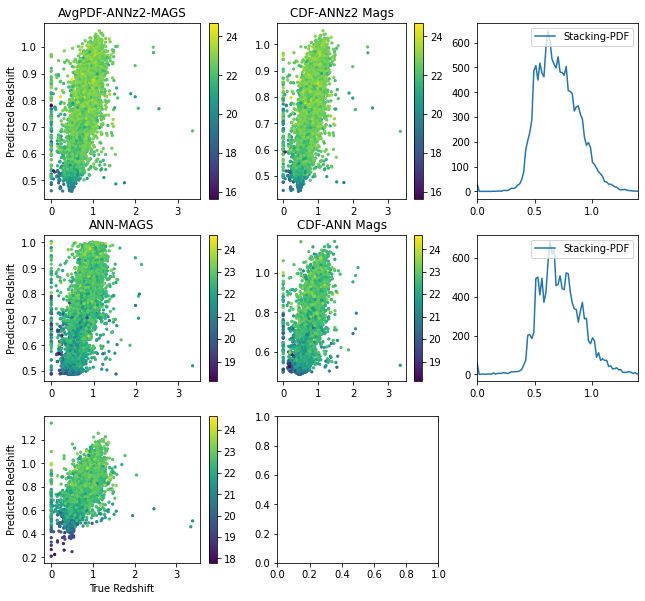

In [31]:
## annz###

fig = plt.figure()
grid = plt.GridSpec(18,18, top = 2,right = 1.5)
ax = plt.subplot(grid[0:6,:6])
plt.scatter(annz["D:z"],annz['F:ANNZ_PDF_avg_0'], c = annz_mags["F:MAG_AUTO_R"],s = 5)
plt.title("AvgPDF-ANNz2-MAGS")
plt.colorbar()
plt.ylabel("Predicted Redshift")


ax = plt.subplot(grid[0:6,7:12])
plt.scatter(annz["D:z"],mc_annz,c =  annz_mags["F:MAG_AUTO_R"],s = 5)
plt.title("CDF-ANNz2 Mags")
plt.colorbar()

ax = plt.subplot(grid[0:6,13:])
plt.plot(x_plot,pdf_final_annz, label = "Stacking-PDF")
plt.xlim(0,1.4)
plt.legend()

### ANN
ax = plt.subplot(grid[7:12,:6])
plt.scatter(ann["z"],ann['ann:z'], c = ann["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.title("ANN-MAGS")

plt.ylabel("Predicted Redshift")


ax = plt.subplot(grid[7:12,7:12])
plt.scatter(ann["z"],mc_ann,c =  ann["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.title("CDF-ANN Mags")

ax = plt.subplot(grid[7:12,13:])
plt.plot(x_plot,pdf_final_ann, label = "Stacking-PDF")
plt.xlim(0,1.4)

plt.legend()

# GPz
ax = plt.subplot(grid[13:,:6])
plt.scatter(gpz["z"],gpz['gpz:z'], c = gpz["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.ylabel("Predicted Redshift")
plt.xlabel("True Redshift")

ax = plt.subplot(grid[13:,7:12])
plt.scatter(ann["z"],mc_gpz,c =  gpz["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.title("CDF-GPz Mags")


ax = plt.subplot(grid[13:,7:12])
plt.plot(x_plot,np.sum(pdf_gpz[:,:],axis=0), label = "Stacking-PDF")
plt.xlim(0,1.4)

plt.legend()


plt.savefig("final-plots/box_all.png",bbox_inches='tight')

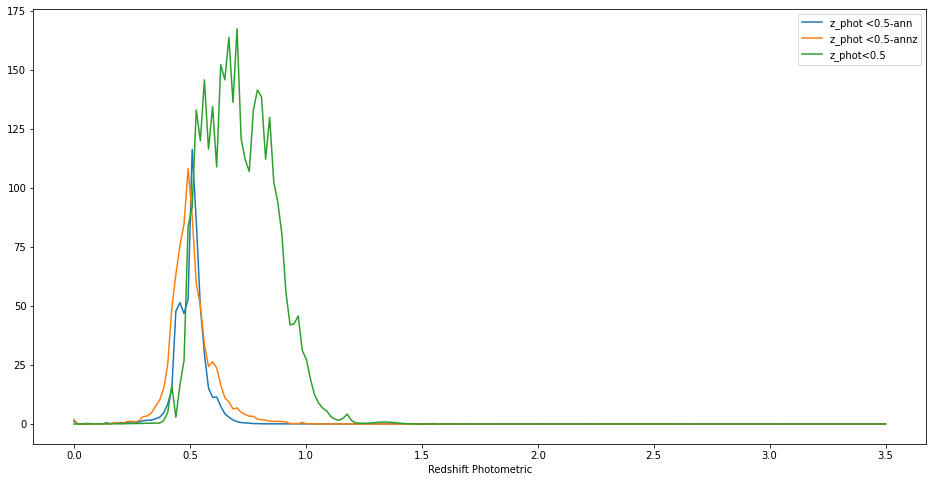

In [75]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
plt.plot(x_plot,np.sum(stack_ann[0],axis = 0),label = "z_phot <0.5-ann")
plt.plot(x_plot,np.sum(stack_annz[0],axis = 0),label = "z_phot <0.5-annz")
plt.plot(x_plot,np.sum(stack_gpz[0],axis = 0)/10,label = "z_phot<0.5")
#for i in range(3):
    #j = j + 0.05
    #st1 = round(j-0.05,3)
    #st2 = round(j,3)
    #plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2))
plt.legend()
plt.xlabel("Redshift Photometric")
plt.savefig("teste1.png",dpi = 300)

Text(0.5, 0, 'Redshift Photometric')

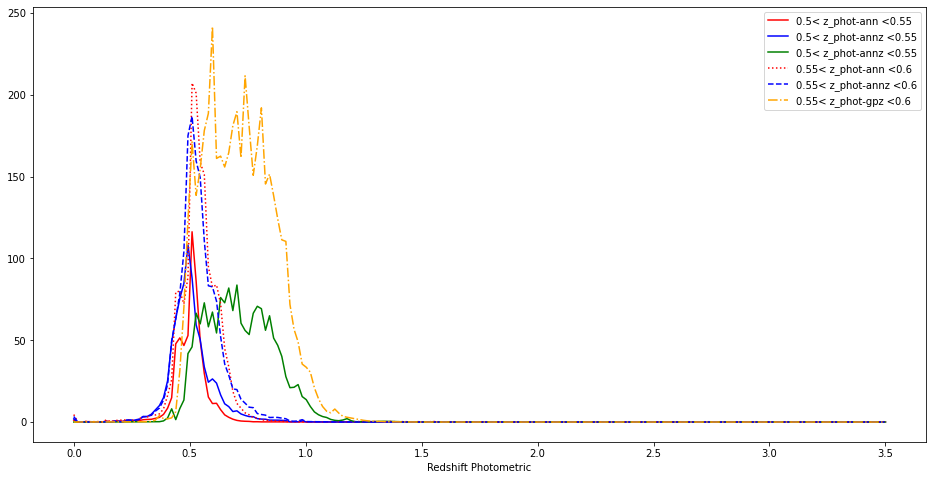

In [90]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
for i in range(2):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    if i == 0:
        plt.plot(x_plot,np.sum(stack_ann[i],axis = 0),label = str(st1)+"< z_phot-ann <"+str(st2), c = "r")
        plt.plot(x_plot,np.sum(stack_annz[i],axis = 0),label = str(st1)+"< z_phot-annz <"+str(st2), c = 'b')
        plt.plot(x_plot,np.sum(stack_gpz[i],axis = 0)/20,label = str(st1)+"< z_phot-annz <"+str(st2), c = 'green')

    else:
        plt.plot(x_plot,np.sum(stack_ann[i],axis = 0),label = str(st1)+"< z_phot-ann <"+str(st2), c = "r", ls = ":")
        plt.plot(x_plot,np.sum(stack_annz[i],axis = 0),label = str(st1)+"< z_phot-annz <"+str(st2), c = 'b',ls = "--")
        plt.plot(x_plot,np.sum(stack_gpz[i],axis = 0)/20,label = str(st1)+"< z_phot-gpz <"+str(st2), c = 'orange', ls = "-.")

plt.legend()
plt.xlabel("Redshift Photometric")
#plt.savefig("teste2.png",dpi = 300)

In [ ]:
ann_bias = metrics.bias(ann["ann:z"].values,ann["z"].values)
annz_bias = metrics.bias(annz['F:ANNZ_best'].values,annz["D:z"].values)
gpz_bias = metrics.bias(gpz["gpz:z"].values,gpz["z"].values)

In [ ]:
ann_sca = metrics.scatter(ann["ann:z"].values,ann["z"].values)
annz_sca = metrics.scatter(annz['F:ANNZ_best'].values,annz["D:z"].values)
gpz_sca = metrics.scatter(gpz["gpz:z"].values,gpz["z"].values)

In [ ]:
ann_fr = metrics.fraction_retained(ann["z"].values,ann["ann:z"].values,0.05)
annz_fr = metrics.fraction_retained(annz["D:z"].values,annz['F:ANNZ_best'].values,0.05)
gpz_fr = metrics.fraction_retained(gpz["z"].values,gpz["gpz:z"].values,0.05)

In [ ]:
ann_68 = metrics.sigma68_vec(ann["z"].values,ann["ann:z"].values)
annz_68 = metrics.sigma68_vec(annz["D:z"].values,annz['F:ANNZ_best'].values)
gpz_68 = metrics.sigma68_vec(gpz["z"].values,gpz["gpz:z"].values)

In [ ]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(annz_bias)//100

In [ ]:
x = np.array(range(0,20+1))*5
x[0]=1

ind68 = x*len(gpz_68)//100

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.sort(ann["ann:z"].values[ind68-1],0),(ann_68[ind68-1]),label = "ann", c= "b", ls = "-")
plt.plot(np.sort(annz["F:ANNZ_best"].values[ind68-1],0),annz_68[ind68-1],label = "annz", c = "g", ls ="--")
plt.plot(np.sort(gpz["gpz:z"].values[ind68-1],0),gpz_68[ind68-1], label = "gpz", c = "r", ls = ":")
plt.legend(loc = "best")
plt.xlabel("Photometric Redshift")

plt.ylabel("$\sigma_{68}$")

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.sort(ann["ann:z"].values[ind-1],0),ann_bias[ind-1],label = "ann", c= "b", ls = "-")
plt.plot(np.sort(annz["F:ANNZ_best"].values[ind-1],0),annz_bias[ind-1],label = "annz", c = "g", ls ="--")
plt.plot(np.sort(gpz["gpz:z"].values[ind-1],0),gpz_bias[ind-1], label = "gpz", c = "r", ls = ":")
plt.legend()
plt.xlabel("Photometric Redshift")
plt.ylabel("Bias")

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.sort(ann["ann:z"].values[ind-1],0),ann_sca[ind-1],label = "ann", c= "b" , ls = "-")
plt.plot(np.sort(annz["F:ANNZ_best"].values[ind-1],0),annz_sca[ind-1],label = "annz", c = "g", ls = "--")
plt.plot(np.sort(gpz["gpz:z"].values[ind-1],0),gpz_sca[ind-1], label = "gpz", c = "r", ls = ":")
plt.legend()
plt.xlabel("Photometric Redshift")
plt.ylabel("$\sigma$")

In [ ]:
np.mean(ann_fr)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.sort(ann["ann:z"].values[ind-1],0),ann_fr[ind-1],label = "ann", c= "b" , ls = "-")
plt.plot(np.sort(annz["F:ANNZ_best"].values[ind-1],0),annz_fr[ind-1],label = "annz", c = "g", ls = "--")
plt.plot(np.sort(gpz["gpz:z"].values[ind-1],0),gpz_fr[ind-1], label = "gpz", c = "r", ls = ":")
plt.legend()
plt.xlabel("Photometric Redshift")
plt.ylabel("$FR_{0.05}$")

In [ ]:
ann_fr = metrics.fraction_retained(ann["z"].values,ann["ann:z"].values,0.10)
annz_fr = metrics.fraction_retained(annz["D:z"].values,annz['F:ANNZ_best'].values,0.10)
gpz_fr = metrics.fraction_retained(gpz["z"].values,gpz["gpz:z"].values,0.10)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.sort(ann["ann:z"].values[ind-1],0),ann_fr[ind-1],label = "ann", c= "b" , ls = "-")
plt.plot(np.sort(annz["F:ANNZ_best"].values[ind-1],0),annz_fr[ind-1],label = "annz", c = "g", ls = "--")
plt.plot(np.sort(gpz["gpz:z"].values[ind-1],0),gpz_fr[ind-1], label = "gpz", c = "r", ls = ":")
plt.legend()
plt.xlabel("Photometric Redshift")
plt.ylabel("$FR_{0.15}$")